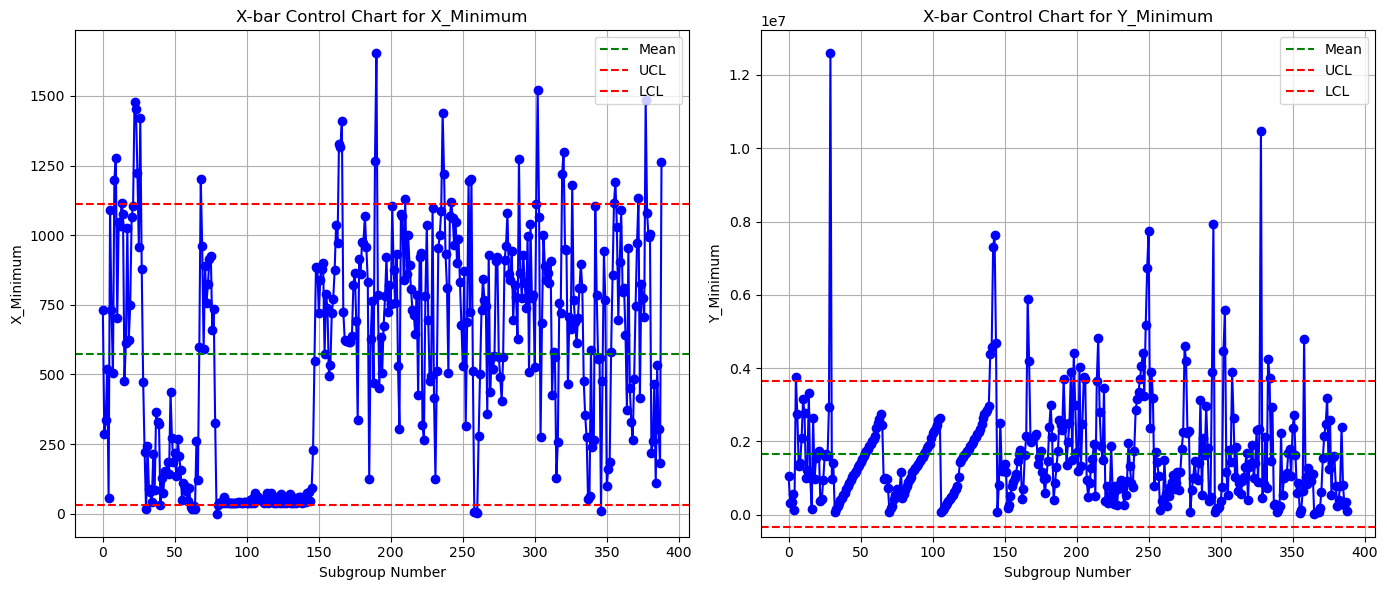

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

# Step 1: Select features for control charts
selected_features = ["X_Minimum", "Y_Minimum"]
sample_size = 5  # Define sample size for control chart analysis

# Step 2: Creating subgroups for control chart by averaging every 5 samples
subgroups = data[selected_features].groupby(np.arange(len(data)) // sample_size).mean()

# Step 3: Calculate control limits for X-bar chart
mean_values = subgroups.mean()  # Calculate mean of subgroup means
sigma_values = subgroups.std()  # Calculate standard deviation of subgroup means
UCL = mean_values + 3 * sigma_values / np.sqrt(sample_size)  # Upper Control Limit
LCL = mean_values - 3 * sigma_values / np.sqrt(sample_size)  # Lower Control Limit

# Step 4: Plot X-bar control charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, feature in enumerate(selected_features):
    axes[i].plot(
        subgroups.index, subgroups[feature], marker="o", linestyle="-", color="blue"
    )
    axes[i].axhline(mean_values[feature], color="green", linestyle="--", label="Mean")
    axes[i].axhline(UCL[feature], color="red", linestyle="--", label="UCL")
    axes[i].axhline(LCL[feature], color="red", linestyle="--", label="LCL")
    axes[i].set_title(f"X-bar Control Chart for {feature}")
    axes[i].set_xlabel("Subgroup Number")
    axes[i].set_ylabel(feature)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Overall Accuracy: 68.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.30      0.44        37
           1       0.96      0.81      0.88        63
           2       0.99      0.92      0.95       120
           3       1.00      0.91      0.95        23
           4       1.00      0.73      0.85        15
           5       0.74      0.53      0.62       110
           6       0.81      0.63      0.71       215

   micro avg       0.88      0.68      0.77       583
   macro avg       0.91      0.69      0.77       583
weighted avg       0.87      0.68      0.76       583
 samples avg       0.68      0.68      0.68       583



c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


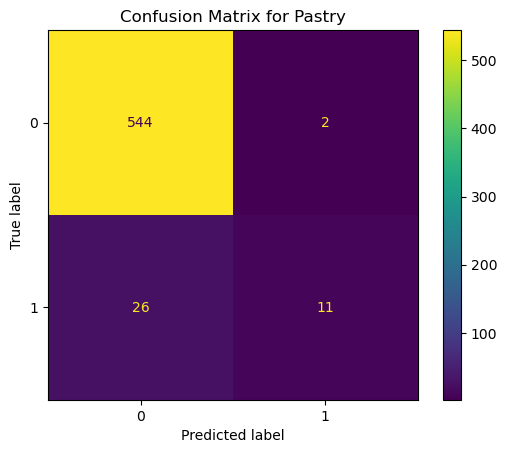

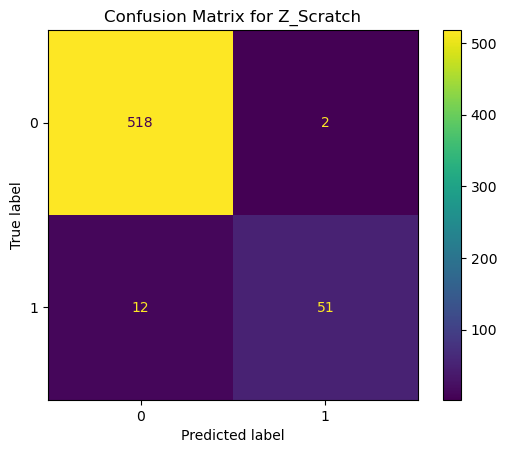

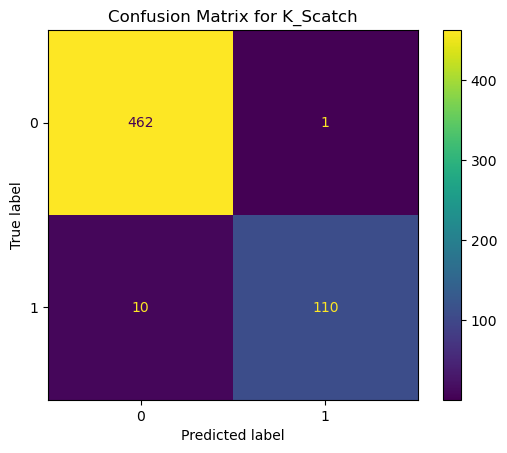

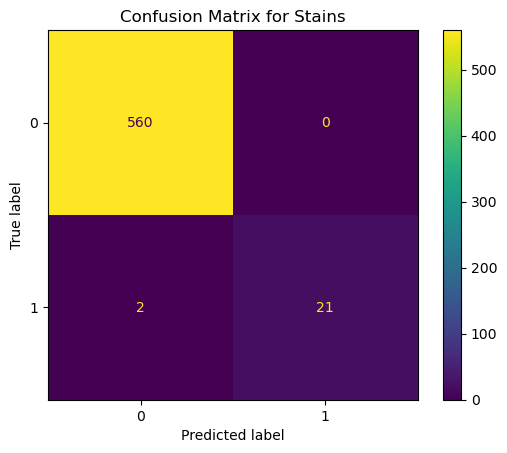

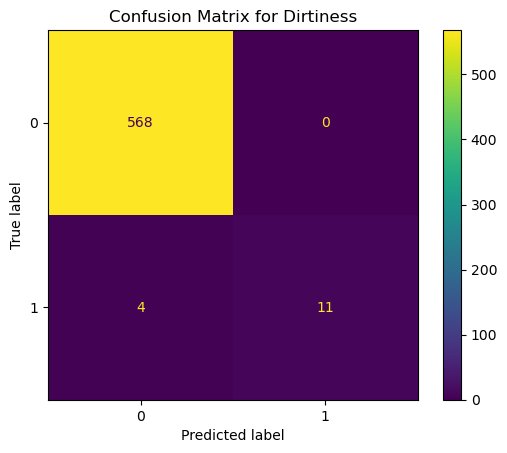

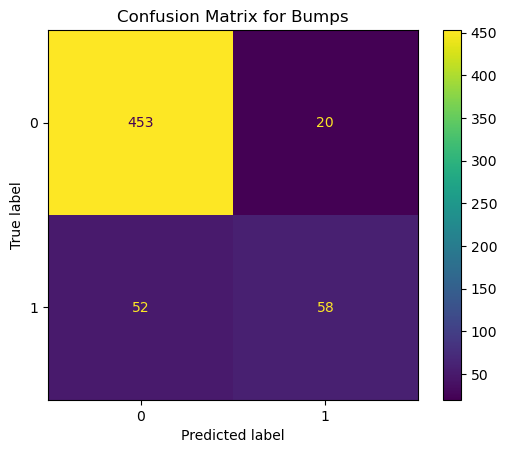

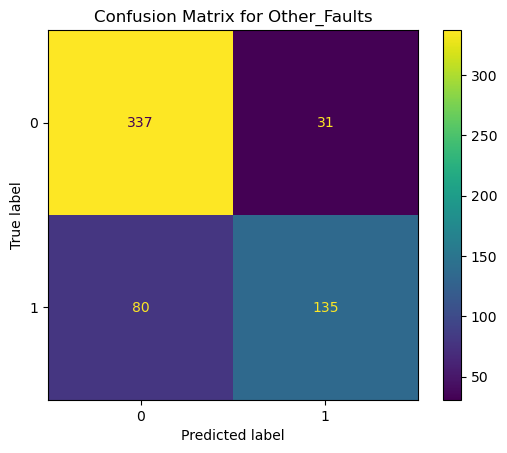

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

# Step 1: Prepare features and labels
features = data.iloc[:, :-7]  # All columns except the last 7 are features
labels = data.iloc[
    :, -7:
]  # The last 7 columns are fault types (multi-label classification)

# Step 2: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

# Step 3: Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrices for each fault type
for i, fault in enumerate(labels.columns):
    cm = confusion_matrix(y_test[fault], y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {fault}")
    plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

# Prepare features and labels
features = torch.tensor(data.iloc[:, :-7].values, dtype=torch.float32)
labels = torch.tensor(data.iloc[:, -7:].values, dtype=torch.float32)

# Create a dataset and split into train and test sets (70% train, 30% test)
dataset = TensorDataset(features, labels)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for batch processing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Step 2: Define the neural network model
class FaultDetectionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FaultDetectionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()  # Sigmoid for multi-label classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)


# Initialize the model, loss function, and optimizer
input_size = features.shape[1]
hidden_size = 64
output_size = labels.shape[1]
model = FaultDetectionNN(input_size, hidden_size, output_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
num_epochs = 20
model.train()  # Set the model to training mode

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# Step 4: Evaluate the model
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        y_true.append(batch_labels.numpy())
        y_pred.append((outputs.numpy() > 0.5).astype(int))  # Threshold at 0.5

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

# Calculate accuracy for each fault type
accuracy_per_fault = (y_true == y_pred).mean(axis=0)
overall_accuracy = (y_true == y_pred).mean()

print("\nAccuracy per fault type:", accuracy_per_fault)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

Epoch [1/20], Loss: 60.6238
Epoch [2/20], Loss: 60.5037
Epoch [3/20], Loss: 60.6238
Epoch [4/20], Loss: 60.6238
Epoch [5/20], Loss: 60.5170
Epoch [6/20], Loss: 60.5037
Epoch [7/20], Loss: 60.6105
Epoch [8/20], Loss: 60.5170
Epoch [9/20], Loss: 60.6372
Epoch [10/20], Loss: 60.6238
Epoch [11/20], Loss: 60.6105
Epoch [12/20], Loss: 60.5437
Epoch [13/20], Loss: 60.5971
Epoch [14/20], Loss: 60.4770
Epoch [15/20], Loss: 60.5971
Epoch [16/20], Loss: 60.5571
Epoch [17/20], Loss: 60.4770
Epoch [18/20], Loss: 60.5971
Epoch [19/20], Loss: 60.6238
Epoch [20/20], Loss: 60.6238

Accuracy per fault type: [0.0806175  0.88679245 0.2161235  0.03773585 0.135506   0.79245283
 0.67409949]
Overall Accuracy: 40.33%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

# Prepare features and labels
features = torch.tensor(data.iloc[:, :-7].values, dtype=torch.float32)
labels = torch.tensor(data.iloc[:, -7:].values, dtype=torch.float32)

# Create a dataset and split into train and test sets (70% train, 30% test)
dataset = TensorDataset(features, labels)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for batch processing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the neural network model with regularization
class FaultDetectionNNWithRegularization(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(FaultDetectionNNWithRegularization, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()  # Sigmoid for multi-label classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)


# Initialize the model
input_size = features.shape[1]
hidden_size = 64
output_size = labels.shape[1]
dropout_rate = 0.5
model = FaultDetectionNNWithRegularization(
    input_size, hidden_size, output_size, dropout_rate
)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
model.train()

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# Evaluate the model
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        y_true.append(batch_labels.numpy())
        y_pred.append((outputs.numpy() > 0.5).astype(int))

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

accuracy_per_fault = (y_true == y_pred).mean(axis=0)
overall_accuracy = (y_true == y_pred).mean()

print("\nAccuracy per fault type:", accuracy_per_fault)
print(f"Overall Accuracy with Regularization: {overall_accuracy * 100:.2f}%")

Epoch [1/20], Loss: 0.5789
Epoch [2/20], Loss: 0.4385
Epoch [3/20], Loss: 0.3722
Epoch [4/20], Loss: 0.3459
Epoch [5/20], Loss: 0.3385
Epoch [6/20], Loss: 0.3263
Epoch [7/20], Loss: 0.3272
Epoch [8/20], Loss: 0.3175
Epoch [9/20], Loss: 0.3167
Epoch [10/20], Loss: 0.3136
Epoch [11/20], Loss: 0.3173
Epoch [12/20], Loss: 0.3178
Epoch [13/20], Loss: 0.3135
Epoch [14/20], Loss: 0.3114
Epoch [15/20], Loss: 0.3102
Epoch [16/20], Loss: 0.3135
Epoch [17/20], Loss: 0.3143
Epoch [18/20], Loss: 0.3120
Epoch [19/20], Loss: 0.3120
Epoch [20/20], Loss: 0.3075

Accuracy per fault type: [0.90737564 0.90566038 0.94168096 0.95711835 0.97255575 0.79588336
 0.65180103]
Overall Accuracy with Regularization: 87.60%


# dataset for easy access :p

data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import pandas as pd
from itertools import product
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("data/Steel_Plates_Processed_Dataset.csv")

# Prepare features and labels
features = torch.tensor(data.iloc[:, :-7].values, dtype=torch.float32)
labels = torch.tensor(data.iloc[:, -7:].values, dtype=torch.float32)

# Create a dataset and split into train and test sets (70% train, 30% test)
dataset = TensorDataset(features, labels)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for batch processing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the neural network model with regularization
class FaultDetectionNNWithRegularization(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(FaultDetectionNNWithRegularization, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()  # Sigmoid for multi-label classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)


# Function to train and evaluate the model with given hyperparameters
def train_and_evaluate(hidden_size, dropout_rate, learning_rate):
    model = FaultDetectionNNWithRegularization(
        input_size, hidden_size, output_size, dropout_rate
    )
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()

    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_features, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            outputs = model(batch_features)
            y_true.append(batch_labels.numpy())
            y_pred.append((outputs.numpy() > 0.5).astype(int))

    y_true = np.vstack(y_true)
    y_pred = np.vstack(y_pred)
    overall_accuracy = (y_true == y_pred).mean()

    return overall_accuracy


# Hyperparameter grid
hidden_sizes = [32, 64, 128]
dropout_rates = [0.3, 0.5, 0.7]
learning_rates = [0.001, 0.01]
num_epochs = 20

# Redefine input and output sizes
input_size = features.shape[1]
output_size = labels.shape[1]

# Perform grid search
results = []
for hidden_size, dropout_rate, learning_rate in product(
    hidden_sizes, dropout_rates, learning_rates
):
    accuracy = train_and_evaluate(hidden_size, dropout_rate, learning_rate)
    results.append((hidden_size, dropout_rate, learning_rate, accuracy))
    print(
        f"Hidden Size: {hidden_size}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}, Accuracy: {accuracy * 100:.2f}%"
    )

# Find the best hyperparameter combination
best_params = max(results, key=lambda x: x[3])

print("\nBest Hyperparameters:")
print(
    f"Hidden Size: {best_params[0]}, Dropout Rate: {best_params[1]}, Learning Rate: {best_params[2]}, Best Accuracy: {best_params[3] * 100:.2f}%"
)

Hidden Size: 32, Dropout Rate: 0.3, Learning Rate: 0.001, Accuracy: 87.65%
Hidden Size: 32, Dropout Rate: 0.3, Learning Rate: 0.01, Accuracy: 88.24%
Hidden Size: 32, Dropout Rate: 0.5, Learning Rate: 0.001, Accuracy: 87.65%
Hidden Size: 32, Dropout Rate: 0.5, Learning Rate: 0.01, Accuracy: 87.65%
Hidden Size: 32, Dropout Rate: 0.7, Learning Rate: 0.001, Accuracy: 87.65%
Hidden Size: 32, Dropout Rate: 0.7, Learning Rate: 0.01, Accuracy: 87.53%
Hidden Size: 64, Dropout Rate: 0.3, Learning Rate: 0.001, Accuracy: 87.94%
Hidden Size: 64, Dropout Rate: 0.3, Learning Rate: 0.01, Accuracy: 88.02%
Hidden Size: 64, Dropout Rate: 0.5, Learning Rate: 0.001, Accuracy: 87.63%
Hidden Size: 64, Dropout Rate: 0.5, Learning Rate: 0.01, Accuracy: 87.36%
Hidden Size: 64, Dropout Rate: 0.7, Learning Rate: 0.001, Accuracy: 87.67%
Hidden Size: 64, Dropout Rate: 0.7, Learning Rate: 0.01, Accuracy: 87.63%
Hidden Size: 128, Dropout Rate: 0.3, Learning Rate: 0.001, Accuracy: 87.55%
Hidden Size: 128, Dropout Rate